In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.datasets import fetch_openml
from sklearn.naive_bayes import GaussianNB

# Question 1

The MNIST database of handwritten digits, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on pre-processing and formatting.

## Code

In [4]:
mnist = fetch_openml('mnist_784')

/opt/homebrew/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


KeyboardInterrupt: 

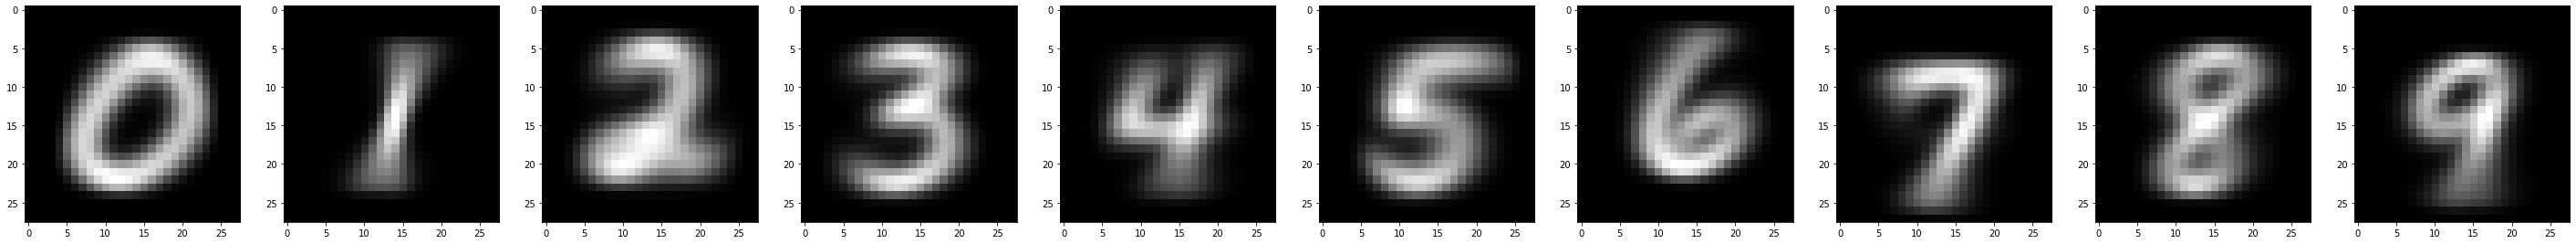

In [ ]:
# fetch mnist data using sklearn fetch_mldata function
mnist = 

x = mnist.data
y = mnist.target
X_train , X_test, Y_train, Y_test = train_test_split(mnist.data,mnist.target,test_size = 0.1)
X_train , X_test = (X_train.to_numpy()) , (X_test.to_numpy())
Y_train  = Y_train.cat.codes
Y_train = Y_train.to_numpy()
Y_test = Y_test.cat.codes
Y_test = Y_test.to_numpy()
meanImgArray = []

for i in range(10):
    tempArray = np.vstack(np.mean(X_train[np.where(Y_train==i)],axis=0))
    meanImgArray.append(tempArray)
    tempArray = []

fig,axes=plt.subplots(1,10,figsize=[50,5])
for i in range(10):
    meanImgArray[i] = meanImgArray[i].reshape(28,28)
    axes[i].imshow(meanImgArray[i],interpolation=None,cmap='gray')

plt.show()

## Result

The images have been displayed above.

# Question 2

Perform Linear Discriminant Analysis (LDA) on the MNIST dataset* for binary as well as for multiclass classification. Plot confusion matric and find out the combinations where the classifier is confused in predicting the right label.

## Code

In [ ]:
import numpy as np
import pprint
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
def covv(x1,x2):
  m1 = np.sum(x1)/len(x1)
  m2 = np.sum(x2)/len(x2)
  temp = (x1-m1)*(x2-m2)
  return np.sum(temp)/len(temp)
# Check if matrix is singular or not
# If matrix is singular then add some noise to it
def sing(c):
  if(np.linalg.det(c) == 0):
    noise = np.random.normal(0,0.000000000001,len(c)**2)
    noise = noise.reshape(len(c),len(c))
    c = c + noise
  return c
# Calculating delta for LDA
def LDA(x,m,c,p):
  t = x - m
  c = np.linalg.inv(c)
  return ( (-1/2)*(np.dot( np.dot(t.T,c) , t)) + np.log(p) )
# Calculating delta for QDA
def QDA(x,m,c,p):
  t = x - m
  d = np.log(abs(np.linalg.det(c)))
  c = np.linalg.inv(c)
  return (-1/2)*( d + (np.dot( np.dot(t.T,c) , t)) ) + np.log(p)

(64, 64)
(64, 64)
----------Binary Classification Report -------------

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        18
     Class 1       1.00      1.00      1.00        18

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



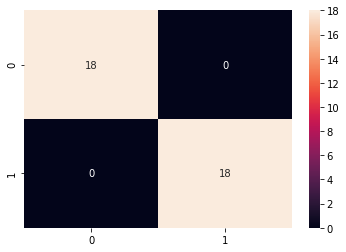

In [ ]:
digits = load_digits()
X = digits.data
y = digits.target
# Select images of 0 and 1 only
X1 = X[( y == 0)]
y1 = y[( y == 0)]
X2 = X[( y == 1)]
y2 = y[( y == 1)]

X1, X_test1, y1, y_test1 = train_test_split(X1, y1, test_size = 0.1,random_state = 42)
X2, X_test2, y2, y_test2 = train_test_split(X2, y2, test_size = 0.1,random_state = 42)
X1 = np.transpose(X1)
X2 = np.transpose(X2)

covM1 = []
for i in X1:
  t = []
  for j in X1:
    t.append(covv(i,j))
  covM1.append(t)

covM2 = []
for i in X2:
  t = []
  for j in X2:
    t.append(covv(i,j))
  covM2.append(t)



# print(covM1.shape)
# print(covM2.shape)

# To remove singularity
covM1 = sing(covM1)
covM2 = sing(covM2)

print(covM1.shape)
print(covM2.shape)
# Average
covM = (covM1 + covM2)/2

# Inverse of the covariance matrix
covInv = np.linalg.inv(covM)

# calculating mean vector
meanVector1T = []
meanVector2T = []

s = len(X1[0]) 
n = len(X1) #number of random variables 64
for i in range(n):
  meanVector1T.append(np.sum(X1[i])/s)
  s = len(X2[0]) 
  n = len(X2)

for i in range(n):
  meanVector2T.append(np.sum(X2[i])/s)

meanVector1 = np.transpose([meanVector1T])
meanVector2 = np.transpose([meanVector2T])
theta = np.dot(covInv ,(meanVector1-meanVector2))

# Prior probability of both will be 1/2 since there are equal number of samples
p0 = 1/2
apriory1 = 1/2
theta0 = np.log(apriory1/p0) - 1/2*( np.dot( np.dot(meanVector1T , covInv),meanVector1 )
- np.dot( np.dot(meanVector2T , covInv), meanVector2 ))


# Predict value using decision boundary
yPredicted = []
yActual = []

# predicting the value
for i in range(len(X_test1)):
  z1 = np.dot(X_test1[i],theta) + theta0
  if(z1 > 0):
    pred = 0
  else:
    pred = 1
  yPredicted.append(pred)
  yActual.append(0)
  z2 = np.dot(X_test2[i],theta) + theta0
  if(z2 > 0):
    pred = 0
  else:
    pred = 1
  yPredicted.append(pred)
  yActual.append(1)

# Confusion matrix
cm = confusion_matrix(yActual, yPredicted)
sns.heatmap(cm, annot = True)
print('----------Binary Classification Report -------------\n')
labels = ['Class 0', 'Class 1']
print(classification_report(yActual, yPredicted, target_names = labels))


---------- Multiclass Classification Report -------------



C:\Users\Aryan Shah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aryan Shah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aryan Shah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00        11
     Class 1       1.00      0.35      0.52        20
     Class 2       0.50      0.07      0.12        15
     Class 3       1.00      0.06      0.12        16
     Class 4       0.06      0.24      0.09        17
     Class 5       1.00      0.21      0.34        24
     Class 6       0.00      0.00      0.00        20
     Class 7       0.14      0.26      0.18        19
     Class 8       0.50      0.07      0.12        14
     Class 9       0.00      0.00      0.00        24

    accuracy                           0.13       180
   macro avg       0.42      0.13      0.15       180
weighted avg       0.43      0.13      0.16       180



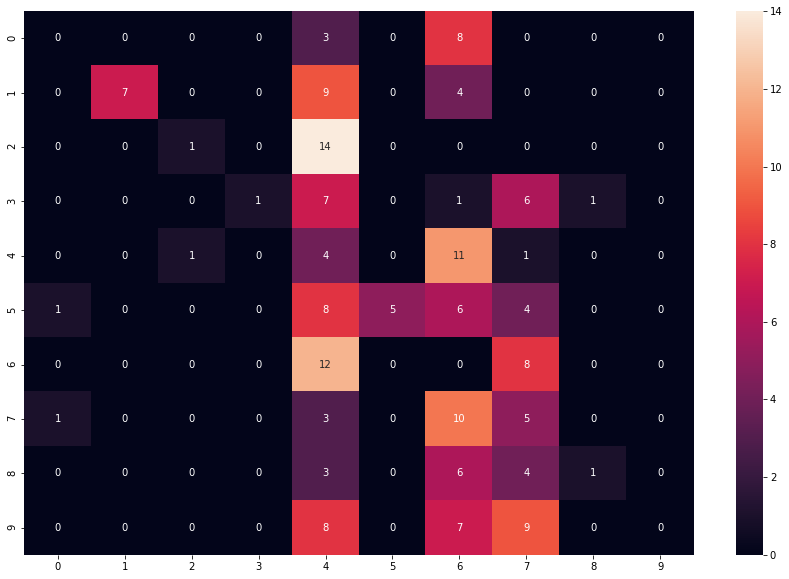

In [ ]:
digits = load_digits()
Xtemp = digits.data
ytemp = digits.target
# Number of classes
k = 10
# Splitting Train:test data into 9:1 ratio
Xtemp, X_test, ytemp, y_test = train_test_split(Xtemp, ytemp, test_size = 0.1)
# 3D arrays for storing data
X = []
total_samples = len(Xtemp)
for i in range(k):
  X.append( Xtemp[(ytemp == i)])

# Prior probability(1,10)
prior = []
for i in range(len(X)):
  prior.append(len(X[i])/total_samples)

meanVector = []
# mean vector: meanVector (10,64)
for i in range(len(X)):
  meanVectorT = []
  for j in range(len(X[0][0])):
    meanVectorT.append(np.sum(X[i][:,j])/len(X[0]))
  meanVector.append(meanVectorT)

# covariance matrix (10,64,64)
covM = []
for i in range(len(X)):
  covM1 = []
  for j in range(len(X[0][0])):
    t = []
    for l in range(len(X[0][0])):
      t.append(covv(X[i][:,j] , X[i][:,l] ))
    covM1.append(t)
  covM1 = sing(covM1)
  covM.append(covM1)
n = len(X[0][0])

# taking average of all the covariance matrices
covariance = [[0 for i in range(n)] for j in range(n)]
for i in covM:
  covariance += i
covariance /= k


############### Testing ########################
yPredicted = []
yActual = []
for i in range(len(y_test)):
  test = np.transpose([X_test[i]])
  delta = []
  for j in range(k):
    delta.append(LDA(test,np.transpose([meanVector[j]]),covM[j],prior[j]))
  yPredicted.append(delta.index(max(delta)))
  yActual.append(y_test[i])

  
# Confusion matrix
fig = plt.figure(figsize = (15,10))
cm = confusion_matrix(yActual, yPredicted)
sns.heatmap(cm, annot = True)
print('---------- Multiclass Classification Report -------------\n')
labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5','Class 6','Class 7', 'Class 8', 'Class 9']
print(classification_report(yActual, yPredicted, target_names = labels))

# Question 3

Perform Quadratic Discriminant Analysis (QDA) on the MNIST dataset* for multiclass classification. Plot confusion matric and find out the combinations where the classifier is confused in predicting the right label.

## Code

---------- Classification Report -------------

              precision    recall  f1-score   support

     Class 0       0.27      0.27      0.27        11
     Class 1       0.55      0.52      0.54        21
     Class 2       1.00      0.14      0.25        14
     Class 3       1.00      0.23      0.38        26
     Class 4       0.36      0.61      0.45        23
     Class 5       0.50      0.28      0.36        18
     Class 6       0.15      0.85      0.26        13
     Class 7       1.00      0.35      0.52        17
     Class 8       0.55      0.35      0.43        17
     Class 9       1.00      0.15      0.26        20

    accuracy                           0.37       180
   macro avg       0.64      0.38      0.37       180
weighted avg       0.67      0.37      0.38       180



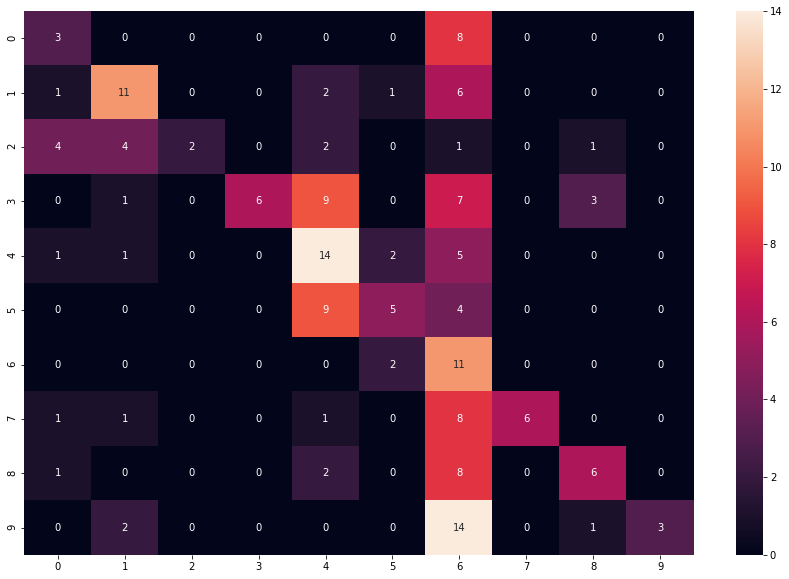

In [ ]:
digits = load_digits()
Xtemp = digits.data
ytemp = digits.target
total_samples = len(Xtemp)
# total number of classes
k = 10

# splitting data into test and train
Xtemp, X_test, ytemp, y_test = train_test_split(Xtemp, ytemp, test_size = 0.1)
# 3D arrays for storing data
X = []
total_samples = len(Xtemp)
for i in range(k):
  X.append( Xtemp[( ytemp == i )])


# prior probabilitis
prior = []
for i in range(len(X)):
  prior.append(len(X[i])/total_samples)


meanVector = []
# mean vectors meanVector (10,64)
for i in range(len(X)):
  meanVectorT = []
  for j in range(len(X[0][0])):
    meanVectorT.append(np.sum(X[i][:,j])/len(X[0]))
  meanVector.append(meanVectorT)

# 3D covariance matrix
covM = []
# calculating covariance matrix for every class
for i in range(len(X)):
  covM1 = []
  for j in range(len(X[0][0])):
    t = []
    for l in range(len(X[0][0])):
      t.append(covv(X[i][:,j] , X[i][:,l] ))
    covM1.append(t)
  covM1 = sing(covM1)
  covM.append(covM1)

#number of random variables
n = len(X[0][0])

yPredicted = []
yActual = []
for i in range(len(y_test)):
  test = np.transpose([X_test[i]])
  delta = []
  for j in range(k):
    delta.append(QDA(test,np.transpose([meanVector[j]]),covM[j],prior[j]))
  yPredicted.append(delta.index(max(delta)))
  yActual.append(y_test[i])

  
# Confusion Matrix
fig = plt.figure(figsize = (15,10))
cm = confusion_matrix(yActual, yPredicted)
sns.heatmap(cm, annot = True)
print('---------- Classification Report -------------\n')
labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6',
'Class 7', 'Class 8', 'Class 9']
print(classification_report(yActual, yPredicted, target_names = labels))


## Observation/Justification

The result is as shown in the graph/confusion matrix above. <br>
For classes 0,4,6 the classifier is not as precise in predicting the correct label/class as compared to other classes.

# Question 4

Perform Naïve-Bayes on the MNIST dataset* for multiclass classification. Plot confusion matric and find out the combinations where the classifier is confused in predicting the right label.

## Code

---------- Classification Report -------------

              precision    recall  f1-score   support

     Class 0       1.00      0.96      0.98        25
     Class 1       0.80      0.80      0.80        20
     Class 2       1.00      0.33      0.50        15
     Class 3       0.95      0.82      0.88        22
     Class 4       0.83      0.91      0.87        11
     Class 5       0.86      0.92      0.89        13
     Class 6       1.00      0.94      0.97        16
     Class 7       0.82      1.00      0.90        18
     Class 8       0.55      0.90      0.68        20
     Class 9       1.00      0.80      0.89        20

    accuracy                           0.84       180
   macro avg       0.88      0.84      0.84       180
weighted avg       0.88      0.84      0.84       180



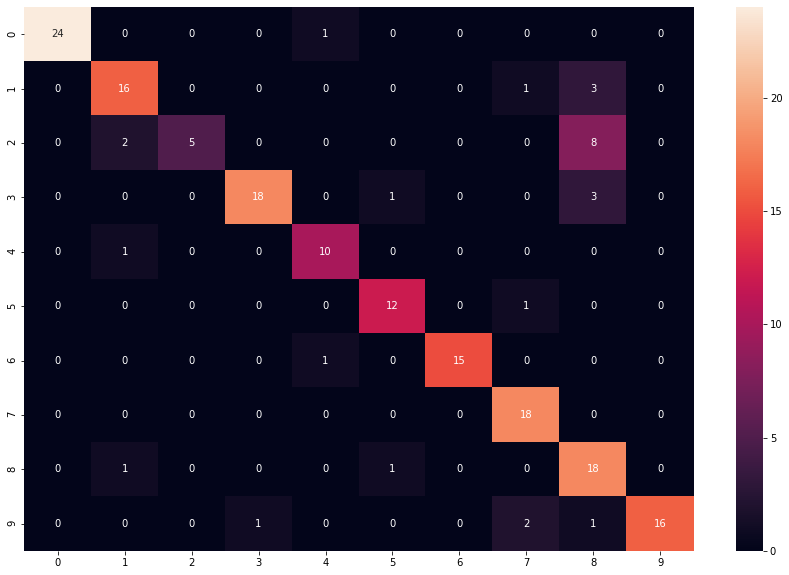

In [ ]:
digits = load_digits()
Xtemp = digits.data
ytemp = digits.target
total_samples = len(Xtemp)

# total number of classes
k = 10

# splitting data into test and train
Xtemp, X_test, ytemp, y_test = train_test_split(Xtemp, ytemp, test_size = 0.1)

# Using Naive-Bayes Classifier from sklearn
model = GaussianNB()
model.fit(Xtemp,ytemp)
yPredicted = model.predict(X_test)

# Confusion Matrix
fig = plt.figure(figsize = (15,10))
cm = confusion_matrix(y_test, yPredicted)
sns.heatmap(cm, annot = True)
print('---------- Classification Report -------------\n')
labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6',
'Class 7', 'Class 8', 'Class 9']
print(classification_report(y_test, yPredicted, target_names = labels))

## Observation/Justification

The result is as shown in the graph/confusion matrix above. <br>
For class 8 the classifier is not as precise in predicting the correct label/class as compared to other classes.

# Question 5

Mean and variance of two classes are, <br>
    Class_1 :  $\mu = 8$ , $\sigma^{2} = 20$  <br>
    Class_2 :  $\mu = 16$ , $\sigma^{2} = 25$  <br>

a. Draw 50 random samples from N[5,20]  <br>
b. Draw 50 random samples from N[11,10]  <br>
c. Draw 50 random samples from N[20,8]  <br>

and classify using Naïve-Bayes classifier having apriory probabilities as (0.5,0.5), (0.3,0.7) and (0.7,0.3) and visualize data and class by plotting histogram.

## Code

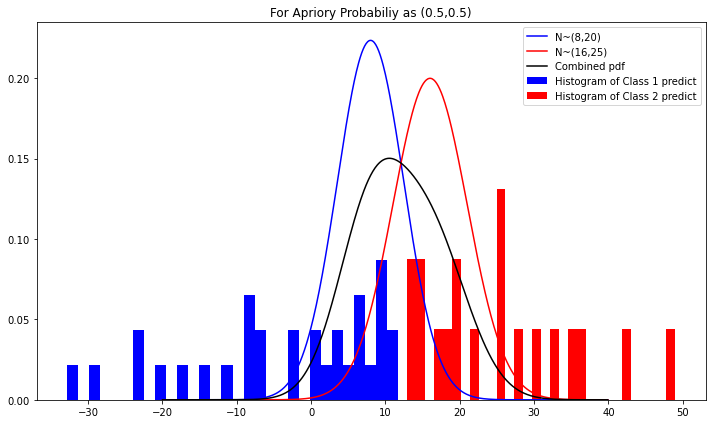

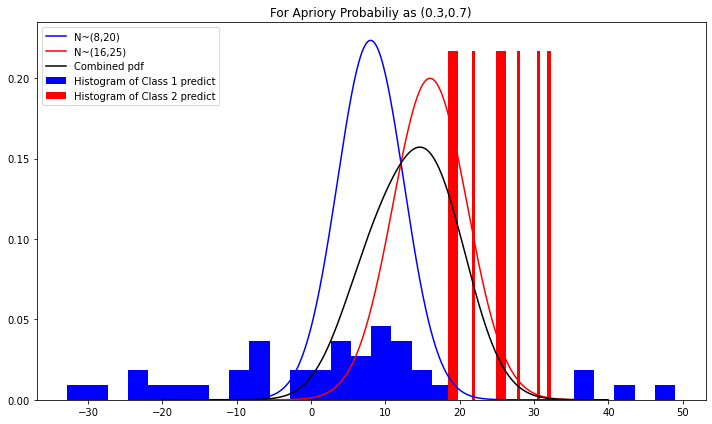

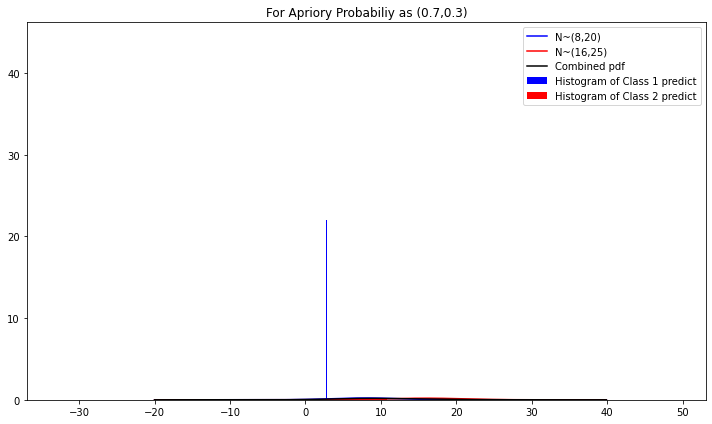

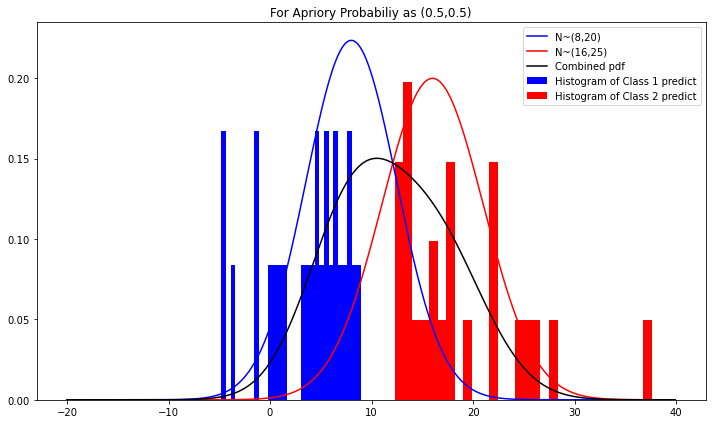

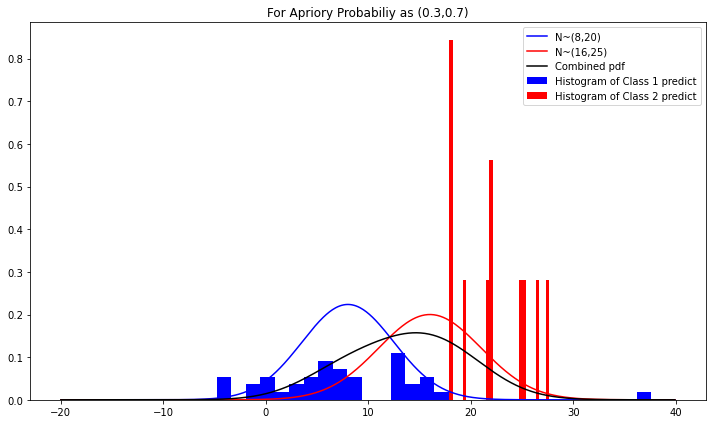

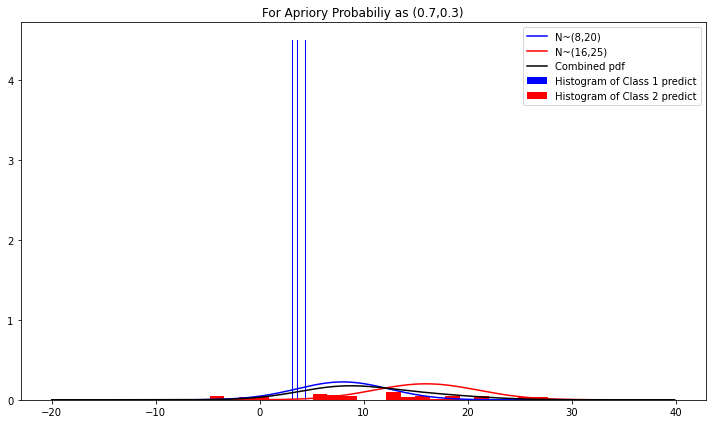

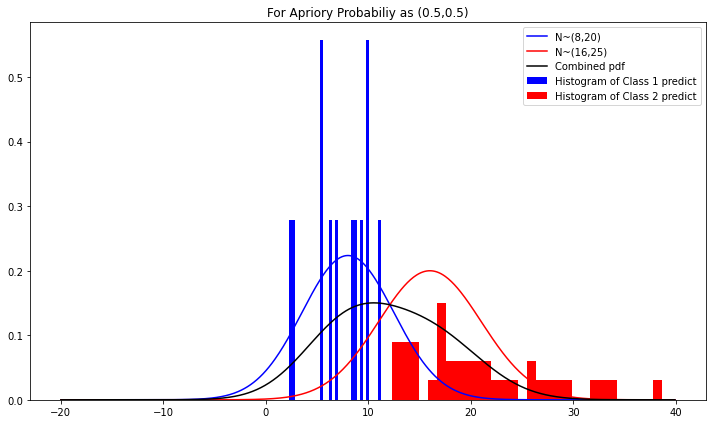

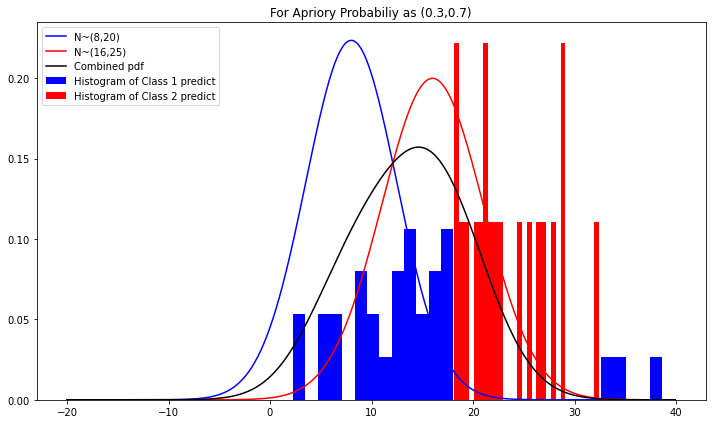

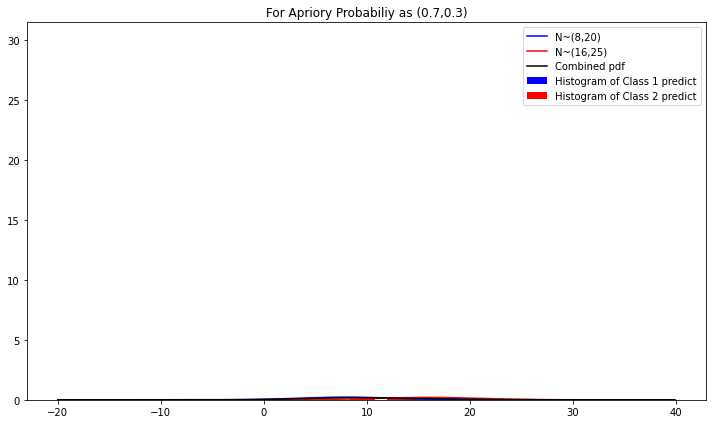

In [ ]:
import math
def plotHistograms(X, Y, apriory1, apriory2):
  x = np.arange(-20, 40, 0.1)
  pdf0 = ((1/math.sqrt(20))*np.exp((-1/2)*((x - 8)/math.sqrt(20))**2))
  pdf1 = ((1/math.sqrt(25))*np.exp((-1/2)*((x - 16)/math.sqrt(25))**2))
  plt.figure(figsize = (10, 6))

  plt.title(f"For Apriory Probabiliy as ({apriory1},{apriory2})")

  plt.hist(X[Y==0], bins=30, density=True, color='blue', label='Histogram of Class 1 predict')
  plt.plot(x, pdf0, 'b', label='N~(8,20)')

  
  plt.hist(X[Y==1], bins=30, density=True, color='red', label='Histogram of Class 2 predict')
  plt.plot(x, pdf1, 'r', label='N~(16,25)')


  pdf2 = apriory1*pdf0 + apriory2*pdf1
  plt.plot(x, pdf2, 'k', label='Combined pdf')
  plt.tight_layout()
  plt.legend()
  plt.show()


def predict(X_i, apriory1, apriory2):
  value1 = ((1/math.sqrt(20))*np.exp((-1/2)*((X_i - 8)/math.sqrt(20))**2))**apriory1
  value2 = ((1/math.sqrt(25))*np.exp((-1/2)*((X_i - 16)/math.sqrt(25))**2))**apriory2
  if value1 > value2:
    return 0
  else:
    return 1


def naive_bayes(X, apriory1, apriory2):
  Y = []
  for i in range(50):
    Y.append(predict(X[i], apriory1, apriory2))
  Y = np.array(Y)
  #Calling plot histogram function
  plotHistograms(X, Y, apriory1, apriory2)


def dataGen(mu, sigma):
  #Generating data for given mu and sigma
  X = np.random.normal(mu, sigma, 50)
  naive_bayes(X, 0.5, 0.5)
  naive_bayes(X, 0.3, 0.7)
  naive_bayes(X, 0.7, 0.3)

dataGen(5, 20)
dataGen(11, 10)
dataGen(20, 8)

## Result

The plotted graphs have been shown above.